In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings
filterwarnings('ignore')
import joblib
import numpy as np

data = pd.read_csv('output.csv')
X = data[['PixelX', 'PixelY']]
y = data[['X', 'Y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
model = MLPRegressor(hidden_layer_sizes=(10,10), max_iter=1, warm_start=True)

train_losses = []
test_losses = []

In [3]:
for i in range(2500):  
    model.fit(X_train_scaled, y_train)
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    
    train_loss = mean_squared_error(y_train, train_pred)
    test_loss = mean_squared_error(y_test, test_pred)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    if i%100 == 1:
        print('Loss:', train_loss, test_loss)

Loss: 40.53040757311305 35.38082877850137
Loss: 33.829544421153464 29.617332878153714
Loss: 24.435323530278993 20.566034504938195
Loss: 14.804019581838809 11.830702276245567
Loss: 6.449368013074951 5.040047926064568
Loss: 1.5877406064227184 1.5079556917899406
Loss: 0.4309880472870073 0.543385060165223
Loss: 0.19873847681990828 0.3041396606544872
Loss: 0.09858397987229803 0.15437204567708296
Loss: 0.05819147066131929 0.08137042680127493
Loss: 0.03941250937762998 0.04773961865165087
Loss: 0.03353094612184854 0.03626421046018294
Loss: 0.03352953584855618 0.03626105325951186
Loss: 0.03352816900166059 0.0362581398423073
Loss: 0.03352682877801323 0.03625538981758867
Loss: 0.03352550714390297 0.03625276234671908
Loss: 0.03352419957431229 0.03625023249043793
Loss: 0.03352290325184918 0.03624778324075452
Loss: 0.033521616294050614 0.03624540212975973
Loss: 0.03352033737206984 0.03624307955139516
Loss: 0.03351906550374985 0.0362408078362888
Loss: 0.03351779993345136 0.03623858069821588
Loss: 0.0

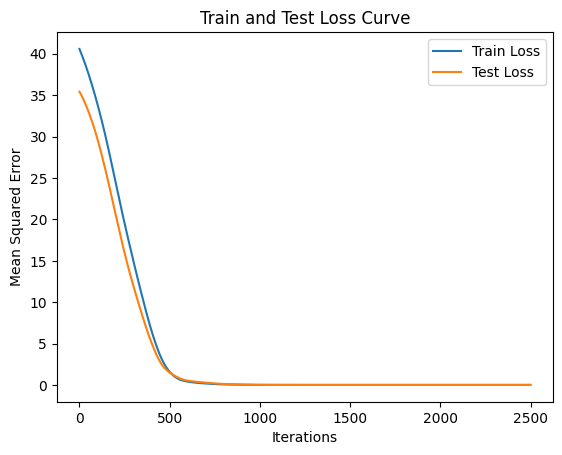

In [4]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Train and Test Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [5]:
joblib.dump(model, 'NN_model_XY_to_xy.pkl')

['NN_model_XY_to_xy.pkl']

In [8]:
loaded_model = joblib.load('NN_model_XY_to_xy.pkl')

# Test with sample input
sample_input = [[54, 560]]  # Example PixelX, PixelY values
sample_input_scaled = scaler.transform(sample_input)
prediction = loaded_model.predict(sample_input_scaled)
print("Predicted X, Y:", prediction)

# Test with multiple points
input_data = np.array([
    [54, 560],
    [52, 624],
    [52, 682],
    [49, 757],
    [54, 810],
    [61, 879],
    [59, 938],
    [57, 51]
])

# Original X, Y values for comparison
original_outputs = np.array([
    [-8.179, 1.226],
    [-8.139, 2.576],
    [-8.289, 4.123],
    [-8.283, 5.653],
    [-8.238, 7.08],
    [-8.256, 8.501],
    [-7.866, 9.739],
    [-8.279, -10.466]
])

input_data_scaled = scaler.transform(input_data)
predictions = loaded_model.predict(input_data_scaled)

print("\nPredicted vs Original X, Y values:")
for i, (pred, orig) in enumerate(zip(predictions, original_outputs)):
    print(f"Point {i+1}: Predicted {pred}, Original {orig}")

Predicted X, Y: [[-7.73945394  1.79381748]]

Predicted vs Original X, Y values:
Point 1: Predicted [-7.73945394  1.79381748], Original [-8.179  1.226]
Point 2: Predicted [-7.7390288   3.23195646], Original [-8.139  2.576]
Point 3: Predicted [-7.70469556  4.53694353], Original [-8.289  4.123]
Point 4: Predicted [-7.71648886  6.22165667], Original [-8.283  5.653]
Point 5: Predicted [-7.59146583  7.41876173], Original [-8.238  7.08 ]
Point 6: Predicted [-7.41951174  8.97770998], Original [-8.256  8.501]
Point 7: Predicted [-7.42204636 10.30335007], Original [-7.866  9.739]
Point 8: Predicted [ -7.78778744 -10.02784148], Original [ -8.279 -10.466]


# 2 model setup


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
from warnings import filterwarnings
filterwarnings('ignore')

data = pd.read_csv('output.csv')

X = data[['PixelX', 'PixelY']]
y_x = data['X']  
y_y = data['Y']  

X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(
    X, y_x, y_y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model_x = LinearRegression()
model_y = LinearRegression()

In [11]:
model_x.fit(X_train_scaled, y_x_train)
model_y.fit(X_train_scaled, y_y_train)

LinearRegression()

In [12]:
x_train_pred = model_x.predict(X_train_scaled)
x_test_pred = model_x.predict(X_test_scaled)
y_train_pred = model_y.predict(X_train_scaled)
y_test_pred = model_y.predict(X_test_scaled)

In [13]:
print("Model Performance:")
print("\nX-coordinate prediction:")
print(f"Train R2: {r2_score(y_x_train, x_train_pred):.4f}")
print(f"Test R2: {r2_score(y_x_test, x_test_pred):.4f}")
print(f"Train MSE: {mean_squared_error(y_x_train, x_train_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_x_test, x_test_pred):.4f}")

print("\nY-coordinate prediction:")
print(f"Train R2: {r2_score(y_y_train, y_train_pred):.4f}")
print(f"Test R2: {r2_score(y_y_test, y_test_pred):.4f}")
print(f"Train MSE: {mean_squared_error(y_y_train, y_train_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_y_test, y_test_pred):.4f}")


Model Performance:

X-coordinate prediction:
Train R2: 0.9996
Test R2: 0.9994
Train MSE: 0.0139
Test MSE: 0.0204

Y-coordinate prediction:
Train R2: 0.9996
Test R2: 0.9997
Train MSE: 0.0155
Test MSE: 0.0101


In [14]:
joblib.dump(model_x, 'linear_model_x.pkl')
joblib.dump(model_y, 'linear_model_y.pkl')
joblib.dump(scaler, 'pixel_scaler.pkl')

['pixel_scaler.pkl']

In [15]:
test_points = np.array([
    [54, 560],
    [52, 624],
    [52, 682],
    [49, 757],
    [54, 810],
    [61, 879],
    [59, 938],
    [57, 51]
])

original_outputs = np.array([
    [-8.179, 1.226],
    [-8.139, 2.576],
    [-8.289, 4.123],
    [-8.283, 5.653],
    [-8.238, 7.08],
    [-8.256, 8.501],
    [-7.866, 9.739],
    [-8.279, -10.466]
])

test_points_scaled = scaler.transform(test_points)
x_pred = model_x.predict(test_points_scaled)
y_pred = model_y.predict(test_points_scaled)

print("\nPredicted vs Original coordinates:")
for i in range(len(test_points)):
    print(f"Point {i+1}:")
    print(f"Original: X={original_outputs[i][0]:.3f}, Y={original_outputs[i][1]:.3f}")
    print(f"Predicted: X={x_pred[i]:.3f}, Y={y_pred[i]:.3f}")
    print()


Predicted vs Original coordinates:
Point 1:
Original: X=-8.179, Y=1.226
Predicted: X=-8.221, Y=1.234

Point 2:
Original: X=-8.139, Y=2.576
Predicted: X=-8.243, Y=2.687

Point 3:
Original: X=-8.289, Y=4.123
Predicted: X=-8.223, Y=4.004

Point 4:
Original: X=-8.283, Y=5.653
Predicted: X=-8.264, Y=5.707

Point 5:
Original: X=-8.238, Y=7.080
Predicted: X=-8.135, Y=6.909

Point 6:
Original: X=-8.256, Y=8.501
Predicted: X=-7.956, Y=8.472

Point 7:
Original: X=-7.866, Y=9.739
Predicted: X=-7.980, Y=9.812

Point 8:
Original: X=-8.279, Y=-10.466
Predicted: X=-8.330, Y=-10.321

